Part 1. Find the main factors that influence the prices.
In this part, I will try looking at the listings.csv dataset.

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data first:
df = pd.read_csv('data/listings.csv')

# replace NaN with 0
df.fillna(0, inplace = True)

# change the price column into a float type
price = df['price']
prices = []
for p in price:
    p = float(p[1:].replace(',', ''))
    prices.append(p)
df['price'] = prices

In [3]:
# remove the invalid rows, such as price or number of beds, bedrooms, etc. <= 0
df = df[df.price > 0]
df = df[df.bathrooms > 0]
df = df[df.bedrooms > 0]
df = df[df.beds > 0]
df = df[df.review_scores_rating > 0]
df = df[df.reviews_per_month > 0]
df = df[df.accommodates > 0]

First, look at the room_type and property_type.

In [4]:
roomProperty_DF = df.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF = roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
6,Boat,Entire home/apt,513.333333
19,House,Entire home/apt,194.824859
29,Townhouse,Entire home/apt,189.818182
22,Loft,Entire home/apt,178.933333
15,Condominium,Entire home/apt,170.490566


<Figure size 1152x1152 with 0 Axes>

(15.5, -0.5)

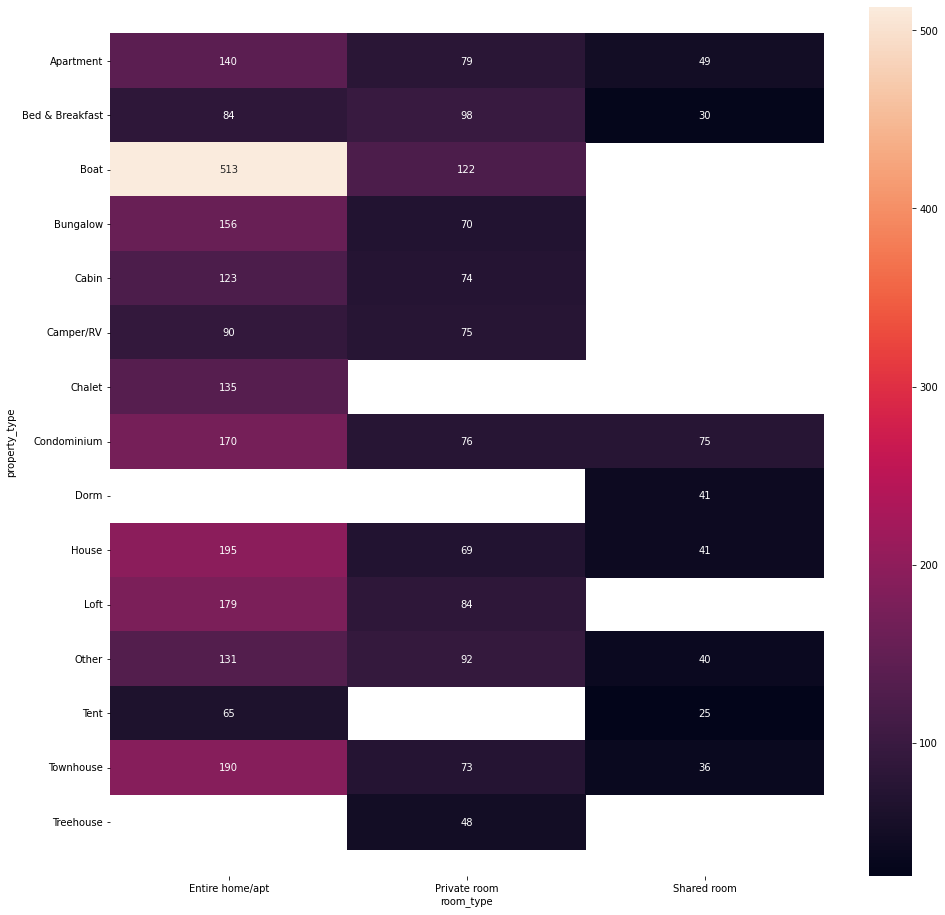

In [5]:
# plotting on a heatMap
plt.figure(figsize=(16, 16))
ax = sns.heatmap(df.groupby(['property_type','room_type']).price.mean().unstack(), annot=True, fmt='.0f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

This chart clearly shows that all prices broke down by property type and room type. And for nearly all property type, prices for Entire home/apartment are the highest.

Next, look at the number of bedrooms.

<Figure size 1296x1584 with 0 Axes>

(87.5, -0.5)

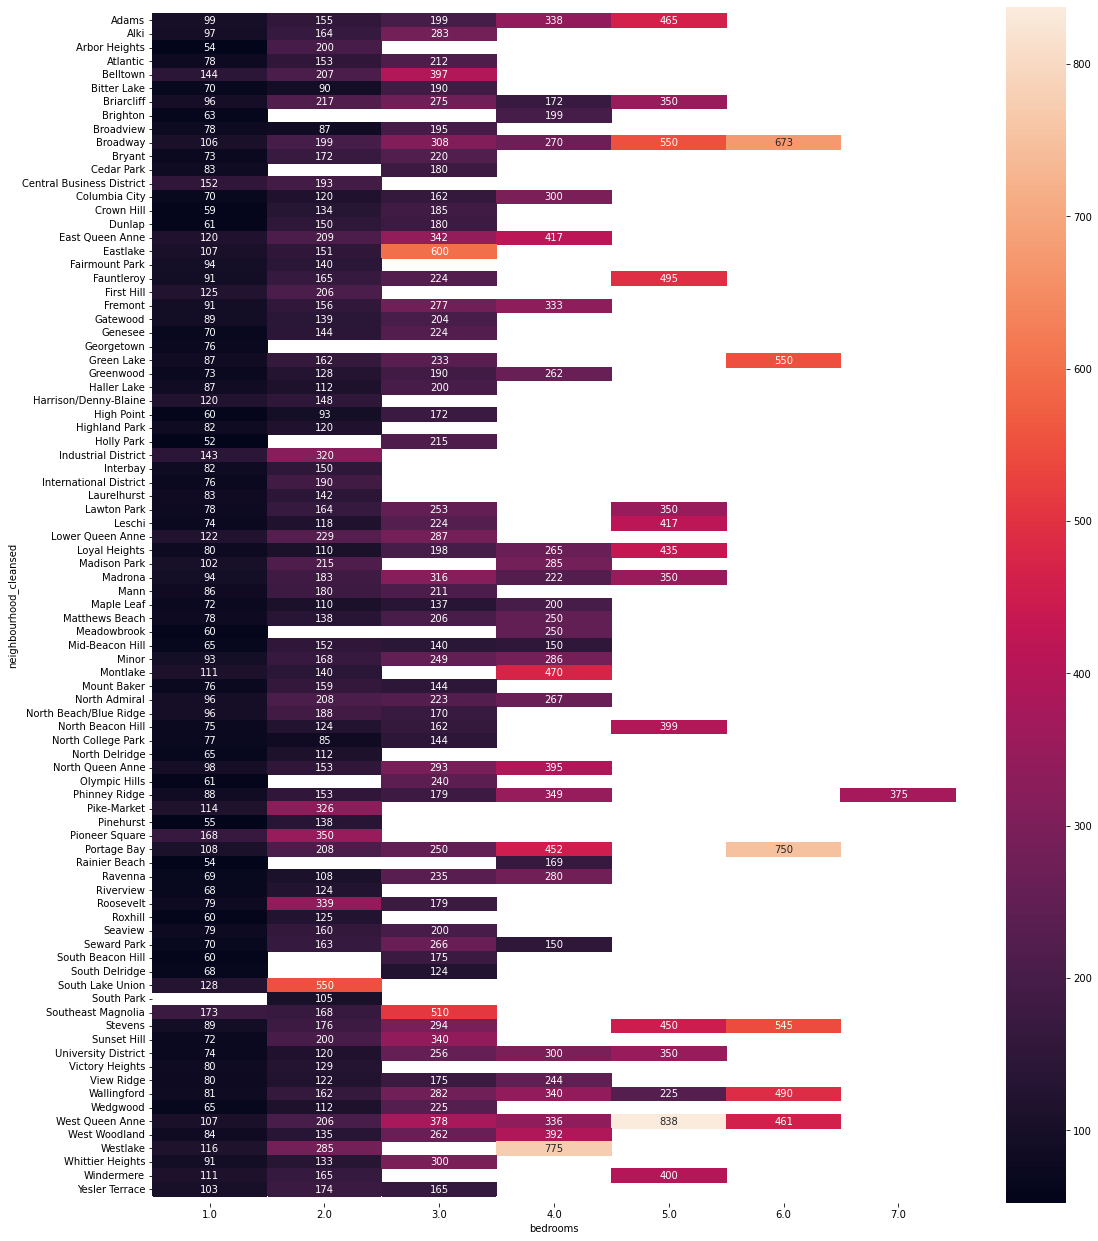

In [6]:
plt.figure(figsize=(18,22))
ax = sns.heatmap(df.groupby(['neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(), annot=True, fmt='.0f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Here we can see that the price is increasing while the number of bedrooms is increasing. And also, it depends on the neighbourhood as well.